In [4]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

## Dataset: COVID-19 CT scans
[link](https://www.kaggle.com/datasets/andrewmvd/covid19-ct-scans)

CT scans plays a supportive role in the diagnosis of COVID-19 and is a key procedure for determining the severity that the patient finds himself in.

Models that can find evidence of COVID-19 and/or characterize its findings can play a crucial role in optimizing diagnosis and treatment, especially in areas with a shortage of expert radiologists.

This dataset contains 20 CT scans of patients diagnosed with COVID-19 as well as segmentations of lungs and infections made by experts.


In [5]:
# metadata contains paths to images
data = pd.read_csv('../input/covid19-ct-scans/metadata.csv')
data

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
0,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
1,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
2,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
3,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
4,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
5,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
6,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
7,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
8,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
9,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...


In [6]:
def read_nii(filepath):
    # Reads .nii file and returns pixel array
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return array

In [7]:
# load sample
sample_idx = 19
sample_ct   = read_nii(data.loc[sample_idx, 'ct_scan'])
sample_lung = read_nii(data.loc[sample_idx, 'lung_mask'])
sample_infe = read_nii(data.loc[sample_idx, 'infection_mask'])
sample_all  = read_nii(data.loc[sample_idx, 'lung_and_infection_mask'])

In [36]:
sample_ct.shape

(630, 630, 45)

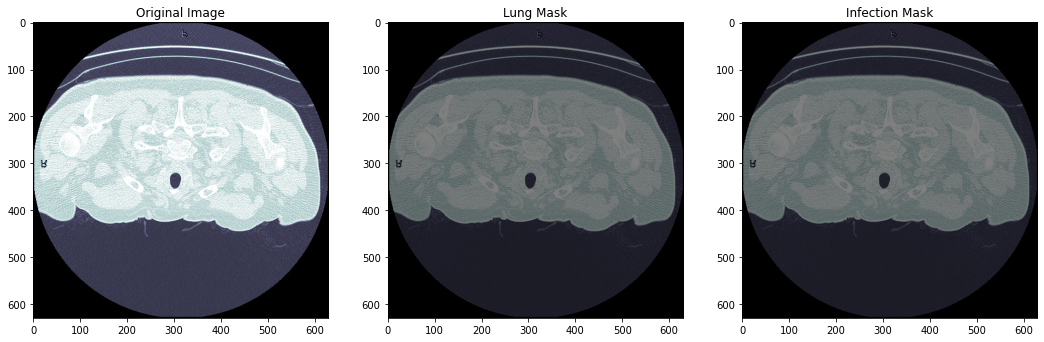

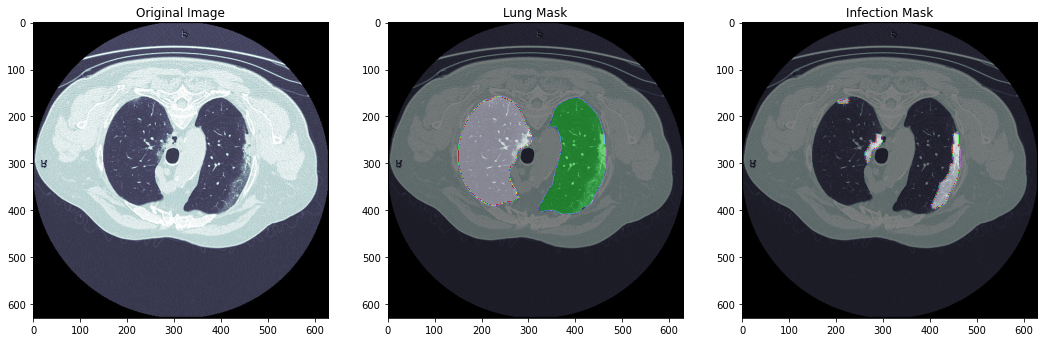

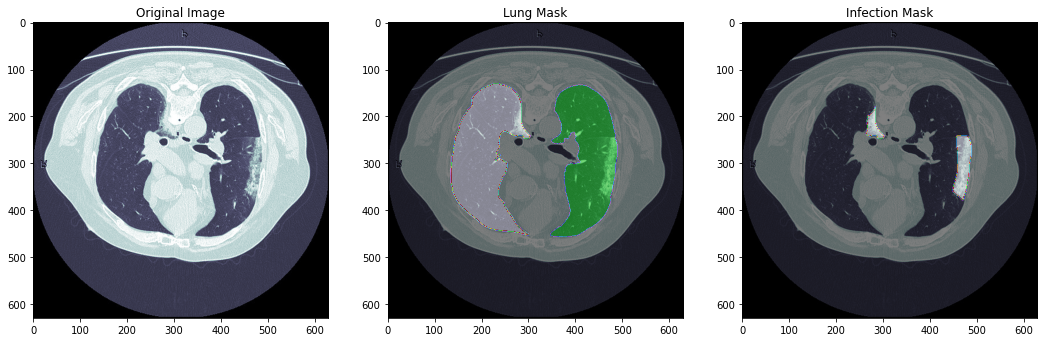

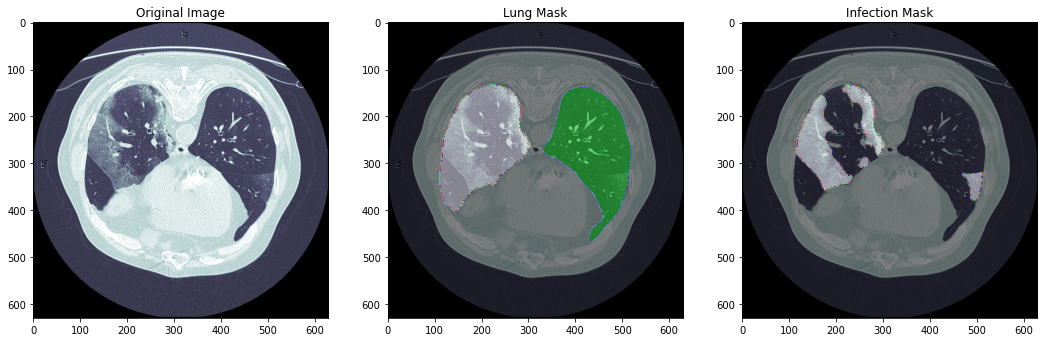

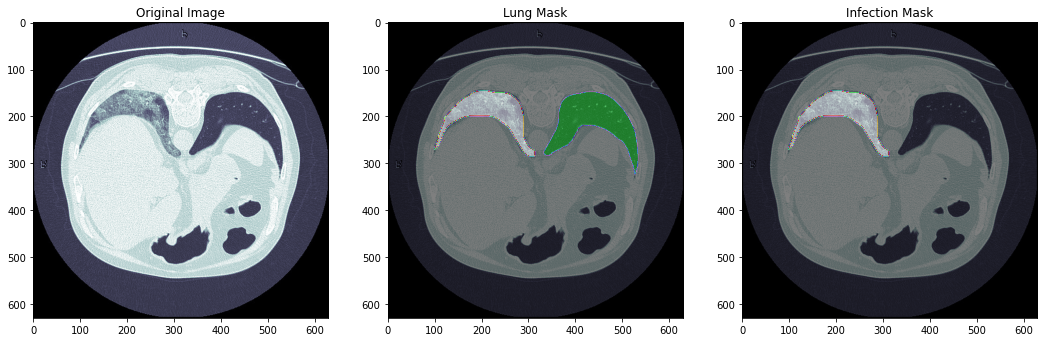

In [37]:
# display sample
for idx in range(sample_ct.shape[2]):
    # idx = 58

    if idx % 10 == 0:
        fig = plt.figure(figsize = (18,15))
        plt.subplot(1,3,1)
        plt.imshow(sample_ct[..., idx], cmap = 'bone')
        plt.title('Original Image')

        plt.subplot(1,3,2)
        plt.imshow(sample_ct[..., idx], cmap = 'bone')
        plt.imshow(sample_lung[..., idx],alpha = 0.5, cmap = 'nipy_spectral')
        plt.title('Lung Mask')

        plt.subplot(1,3,3)
        plt.imshow(sample_ct[..., idx], cmap = 'bone')
        plt.imshow(sample_infe[..., idx], alpha = 0.5, cmap = 'nipy_spectral')
        plt.title('Infection Mask')

Iz dataseta uzecemo samo one slike cije maske imaju vise od 50 piksela

Primer slike koja ce se preskociti (necemo je koristiti za segmentaciju)

![unused image](../output.png)

In [8]:
    
lungs = []
infections = []
img_size = 256
s = 0
ss = 0
use_only_infected = True

for i in range(len(data)):
    ct = read_nii(data['ct_scan'][i])
    infect = read_nii(data['infection_mask'][i])
    s += ct.shape[2]

    for ii in range(ct.shape[2]):
        lung_img = cv2.resize(ct[ii], dsize = (img_size, img_size), interpolation = cv2.INTER_AREA)
        # lung_img = cv2.resize(ct[ii], dsize = (img_size, img_size)).astype('uint8')
        infec_img = cv2.resize(infect[ii], dsize=(img_size, img_size), interpolation = cv2.INTER_AREA).astype('uint8')
        # infec_img = cv2.resize(infect[ii], dsize=(img_size, img_size)).astype('uint8')

        if use_only_infected:
            # we will use only infected images
            if (infec_img.sum() >= 70):
                lungs.append(lung_img[..., np.newaxis])
                infections.append(infec_img[..., np.newaxis])
                ss += 1
        else:
            lungs.append(lung_img[..., np.newaxis])
            infections.append(infec_img[..., np.newaxis])

lungs = np.array(lungs)
infections = np.array(infections)

print(lungs.shape)
print(infections.shape)
print('Total scans: ', s)
print('Infected scans: ', ss)
# 1140 ct-scan images with labeled infections

(851, 256, 256, 1)
(851, 256, 256, 1)
Total scans:  3520
Infected scans:  851


Text(0.5, 1.0, 'Infection Mask')

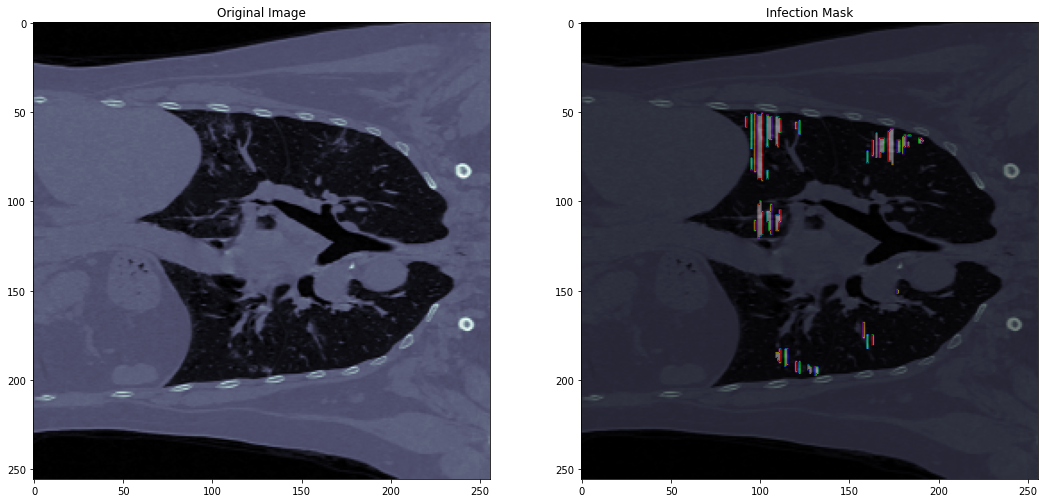

In [10]:
test_idx = 100
fig = plt.figure(figsize = (18,15))
plt.subplot(1,2,1)
plt.imshow(lungs[test_idx], cmap = 'bone')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(lungs[test_idx], cmap = 'bone')
plt.imshow(infections[test_idx], alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Infection Mask')

In [11]:
# train test split
lung_train, lung_test, infect_train, infect_test = train_test_split(lungs, infections, test_size=0.15, shuffle=True)

print('Training size: ', len(lung_train))
print('Testing size: ', len(lung_test))

Training size:  723
Testing size:  128


In [12]:
# Srednja vrednost maski u trening setu
infect_train.sum() / len(infect_train)

865.4896265560166

In [13]:
# srednja vrednost maski u test setu (zbog male kolicine podataka trudimo se da bude sto blize training setu)
infect_test.sum() / len(infect_test)

937.640625

In [14]:
np.unique(infect_train)

array([0, 1], dtype=uint8)

Text(0.5, 1.0, 'Infection Mask')

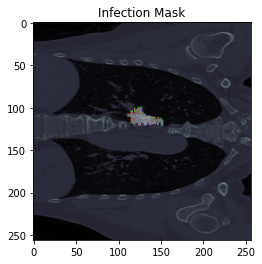

In [15]:
idx = 234
plt.figure()
plt.imshow(lung_train[idx], cmap = 'bone')
plt.imshow(infect_train[idx], alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Infection Mask')


![unet](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)
![unet](../unet.png)

In [17]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *


def build_model(start_neurons):

    input_layer = Input((img_size, img_size, 1))

    # normalizacija ulaza 
    norm = LayerNormalization()(input_layer)

    # 256 -> 128
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(norm)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    # 128 -> 64
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.25)(pool2)

    # 64 -> 32
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.25)(pool3)

    # 32 -> 16
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.25)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

    # 16 -> 32
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.25)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    # 32 -> 64
    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.25)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    # 64 -> 128
    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.25)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    # 128 -> 256
    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.25)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)

    return Model(input_layer, output_layer) 

In [18]:

img_size = 256
start_neurons = 16
model = build_model(start_neurons)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 256, 256, 1)          2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['layer_normalization[0][0]'] 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['conv2d[0][0]']          

In [19]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(lung_train, infect_train, epochs=20, validation_data=[lung_test, infect_test], shuffle=True, callbacks=[early_stopping_callback])

Epoch 1/20
23/23 [==============================] - 107s 5s/step - loss: 0.6879 - accuracy: 0.9868 - val_loss: 0.6820 - val_accuracy: 0.9857
Epoch 2/20
23/23 [==============================] - 106s 5s/step - loss: 0.6769 - accuracy: 0.9868 - val_loss: 0.6711 - val_accuracy: 0.9857
Epoch 3/20
23/23 [==============================] - 106s 5s/step - loss: 0.6660 - accuracy: 0.9868 - val_loss: 0.6604 - val_accuracy: 0.9857
Epoch 4/20
23/23 [==============================] - 106s 5s/step - loss: 0.6554 - accuracy: 0.9868 - val_loss: 0.6499 - val_accuracy: 0.9857
Epoch 5/20
23/23 [==============================] - 106s 5s/step - loss: 0.6449 - accuracy: 0.9868 - val_loss: 0.6395 - val_accuracy: 0.9857
Epoch 6/20
23/23 [==============================] - 106s 5s/step - loss: 0.6346 - accuracy: 0.9868 - val_loss: 0.6294 - val_accuracy: 0.9857
Epoch 7/20
23/23 [==============================] - 106s 5s/step - loss: 0.6245 - accuracy: 0.9868 - val_loss: 0.6194 - val_accuracy: 0.9857
Epoch 8/20
23

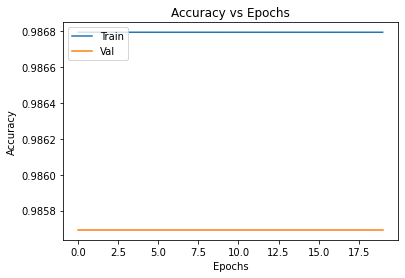

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

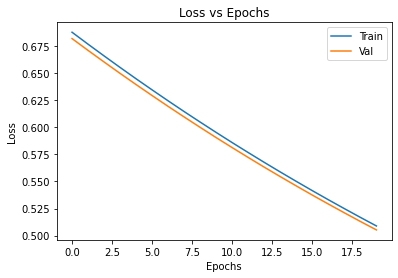

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [23]:
# predict
predicted = model.predict(lung_test)

4/4 [==============================] - 6s 1s/step


131
25747.55


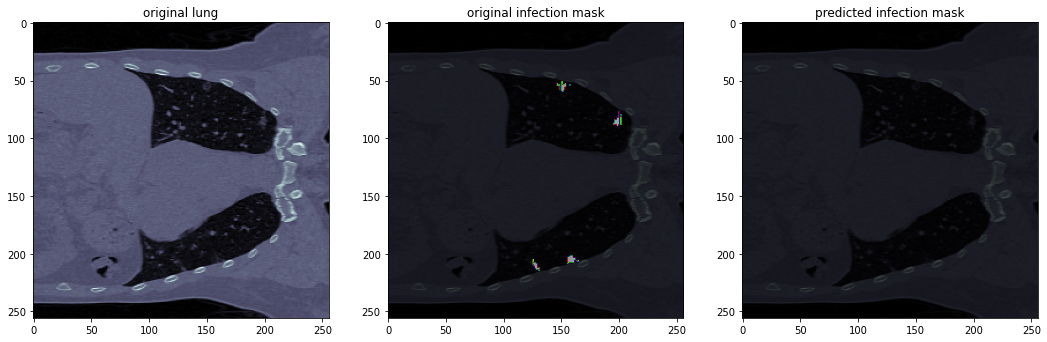

In [37]:
fig = plt.figure(figsize = (18,15))

# bira se slika iz test seta (naci dobar i los primer)
idx = 10

plt.subplot(1,3,1)
plt.imshow(lung_test[idx], cmap = 'bone')
plt.title('original lung')

plt.subplot(1,3,2)
plt.imshow(lung_test[idx], cmap = 'bone')
plt.imshow(infect_test[idx],alpha = 0.7, cmap = "nipy_spectral")
plt.title('original infection mask')

plt.subplot(1,3,3)
plt.imshow(lung_test[idx], cmap = 'bone')
plt.imshow(predicted[idx], alpha = 0.7, cmap = "nipy_spectral")
plt.title('predicted infection mask')

print(infect_test[idx].sum())
print(predicted[idx].sum())